<a href="https://colab.research.google.com/github/annalamboglia/Minicontest1/blob/main/Minicontest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
#Collegamento al Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importo il csv

with open("/content/drive/MyDrive/Minicontest2/Training.xlsx", 'rb') as fp:
    df = pd.read_excel(fp)

df

In [ ]:
#Look at the data types whitch columns need to be encoded
df.dtypes

In [ ]:
#NaN Values
df1 = df[df.isna().any(axis=1)]

df1

In [6]:
#Count the number of empty values of each columns in dataset
df.isna().sum()

Material_1               0
Type_1                   8
Pretreatment_1           1
Moisture_1              51
Volatiles_1             43
Fixed Carbon_1          49
Ash_1                   12
HHV, MJ/Kg_1            94
C_1                     13
H_1                     13
N_1                     36
O_1                     14
S_1                    111
Cl_1                   172
H/C(0)_1                13
O/C(0)_1                13
Cellulose_1             93
Hemicellulose_1        107
Lignin_1               102
Extractives_1          128
Particle Size, mm_1    143
O/C oil                  0
dtype: int64

#Correlazione

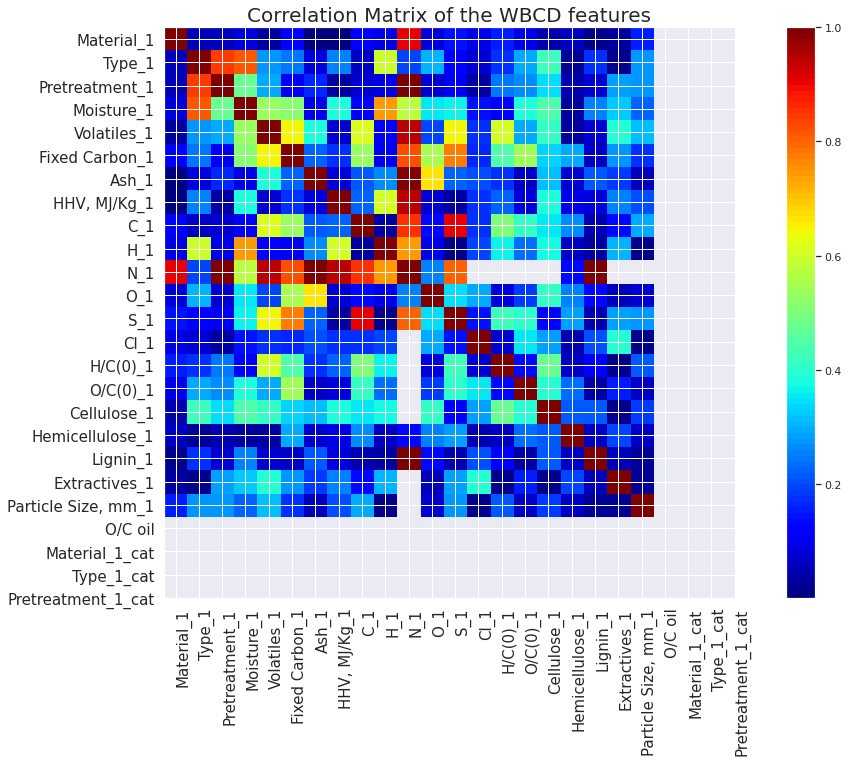

In [42]:
# Bivariate Analysis
# Make a Features Correlation Matrix of the WBCD features
# Readapted from AN6U5

def features_correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm
    fig = plt.figure()
    fig.set_size_inches(18.5, 10.5)
    ax1 = fig.add_subplot(111)
    
    cmap = cm.get_cmap('jet', 100)
    
    # interpolation='nearest' simply displays an image without 
    # trying to interpolate between pixels if the display 
    # resolution is not the same as the image resolution
    # The correlation is returned in absolute values:
    cax = ax1.imshow(df.corr().abs(), interpolation="nearest", \
                     cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation Matrix of the WBCD features',fontsize=20)
    labels=list(df.columns)
    
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    
    ax1.set_xticklabels(labels,fontsize=15,\
              horizontalalignment="left", rotation='vertical')
    
    ax1.set_yticklabels(labels,fontsize=15)
    
    # Add a colorbar
    fig.colorbar(cax, ticks=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, \
                             0.2, 0.4, 0.6, 0.8, 1])
    plt.show()


# Drop the Outcome column from Df and copy it into df_features
df_features = df.drop(df.columns[-1],axis=1)
# Run the correlation_matrix function, using df_features as argument
features_correlation_matrix(df_features)

In [43]:
# Dropping of features with a correlation greater than 0.8
# Code readapted from Chris Albon
# Create the correlation matrix with absolute values
corr_matrix = df_features.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [44]:
to_drop

['Fixed Carbon_1', 'Ash_1', 'Cl_1', 'O/C(0)_1', 'Material_1_cat']

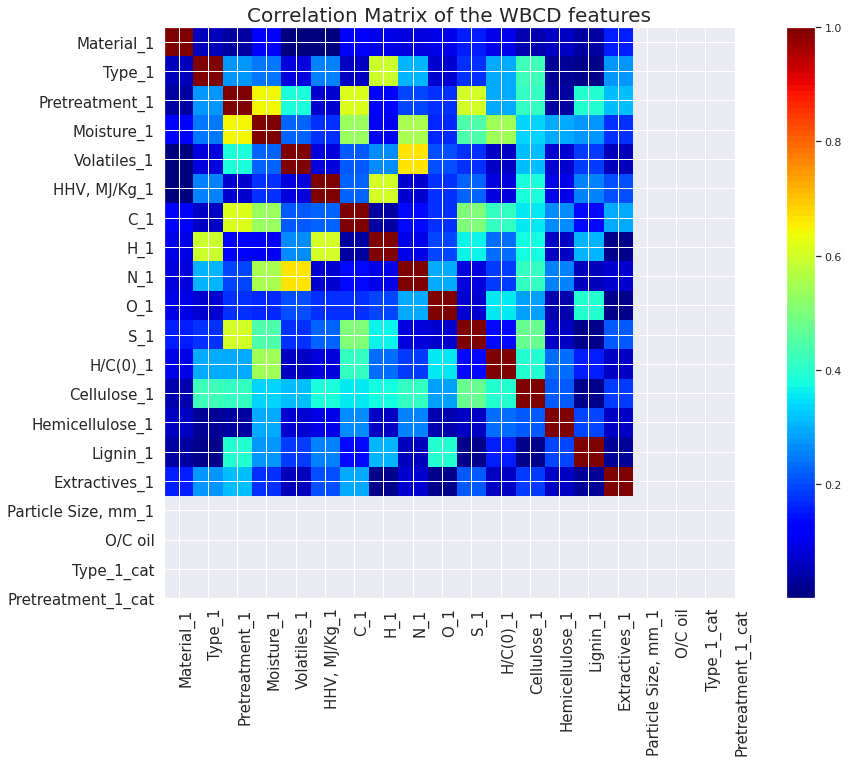

In [45]:
# Drop the redundant features from the df
df_features_corr_dropped = df_features.drop(df_features[to_drop], axis=1)

# Re-plot the dropped df containing only not-redundant features
# Using the feature_correlation_matrix() function
features_correlation_matrix(df_features_corr_dropped)

In [46]:
# Print a table with all the features correlations
# Redundant features were dropped from the original 30 features dataset
# To get the correlation, we apply the .corr() method
# followed by the .abs() method to the df_features_corr_dropped DataFrame
df_features_corr_dropped.corr().abs()

,Moisture_1,Volatiles_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,H/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,O/C oil,Type_1_cat,Pretreatment_1_cat
Moisture_1,1.000000,0.054692,0.033974,0.117045,0.009070,0.000106,0.119112,0.094145,0.087100,0.091152,0.153174,0.090820,0.049510,0.068624,0.039666,0.154981
Volatiles_1,0.054692,1.000000,0.277812,0.249359,0.080177,0.255256,0.069037,0.599977,0.304352,0.072116,0.177574,0.298567,0.424051,0.027601,0.010583,0.279229
"HHV, MJ/Kg_1",0.033974,0.277812,1.000000,0.643469,0.390053,0.075775,0.616884,0.129389,0.191990,0.172727,0.600438,0.298651,0.417136,0.032820,0.393316,0.317517
C_1,0.117045,0.249359,0.643469,1.000000,0.224369,0.171533,0.531252,0.107326,0.551053,0.163093,0.446867,0.544235,0.339812,0.293283,0.279125,0.173267
H_1,0.009070,0.080177,0.390053,0.224369,1.000000,0.084019,0.210793,0.266188,0.669096,0.201306,0.171631,0.068360,0.314784,0.074267,0.185610,0.051386
N_1,0.000106,0.255256,0.075775,0.171533,0.084019,1.000000,0.225466,0.607738,0.079665,0.173752,0.221152,0.086579,0.387565,0.094640,0.258295,0.202572
O_1,0.119112,0.069037,0.616884,0.531252,0.210793,0.225466,1.000000,0.034509,0.131053,0.174177,0.505006,0.410636,0.352281,0.267108,0.130703,0.300052
S_1,0.094145,0.599977,0.129389,0.107326,0.266188,0.607738,0.034509,1.000000,0.092991,0.190215,0.362142,0.231900,0.375069,0.064288,0.301615,0.015651
H/C(0)_1,0.087100,0.304352,0.191990,0.551053,0.669096,0.079665,0.131053,0.092991,1.000000,0.290752,0.082525,0.187861,0.418558,0.252231,0.059597,0.074215
Cellulose_1,0.091152,0.072116,0.172727,0.163093,0.201306,0.173752,0.174177,0.190215,0.290752,1.000000,0.073139,0.351094,0.284605,0.044553,0.396772,0.018274


#Encoding

In [7]:
categorical_cols=df.columns[df.dtypes==object].tolist()
categorical_cols

['Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1']

In [8]:
df["Material_1_cat"]=df["Material_1"].astype('category').cat.codes
df["Type_1_cat"]=df["Type_1"].astype('category').cat.codes
df["Pretreatment_1_cat"]=df["Pretreatment_1"].astype('category').cat.codes
df["Particle Size, mm_1_cat"]=df["Particle Size, mm_1"].astype('category').cat.codes
df.head()

,Material_1,Type_1,Pretreatment_1,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,"Particle Size, mm_1",O/C oil,Material_1_cat,Type_1_cat,Pretreatment_1_cat,"Particle Size, mm_1_cat"
0,japonica alga,algae,acid_washed,5.03,NaN,NaN,7.32,14.27,43.76,6.00,2.76,55.38,NaN,NaN,0.137112,1.265539,NaN,NaN,NaN,NaN,NaN,0.469887,22,1,0,-1
1,bamboo,agricultural_waste,none,7.30,90.90,0.10,1.70,17.70,46.90,5.85,0.21,47.02,0.02,NaN,0.124733,1.002559,41.0,26.5,25.3,NaN,0.6,2.561132,5,0,2,11
2,japonica alga,algae,none,6.90,NaN,NaN,20.21,16.96,41.22,7.73,1.17,49.88,NaN,NaN,0.187530,1.210092,NaN,NaN,NaN,NaN,NaN,0.393652,22,1,2,-1
3,beech wood,hardwood,none,8.00,NaN,NaN,0.54,NaN,48.44,5.83,NaN,45.73,NaN,NaN,0.120355,0.944055,NaN,NaN,NaN,NaN,NaN,0.236315,6,5,2,-1
4,rice straw,agricultural_waste,none,10.80,66.89,14.57,7.56,NaN,39.98,2.45,4.43,52.61,0.53,NaN,0.061281,1.315908,NaN,NaN,NaN,NaN,0.6 mm <particle diameter < 1.18 mm,1.952824,40,0,2,12


In [9]:
df.columns

Index(['Material_1', 'Type_1', 'Pretreatment_1', 'Moisture_1', 'Volatiles_1',
       'Fixed Carbon_1', 'Ash_1', 'HHV, MJ/Kg_1', 'C_1', 'H_1', 'N_1', 'O_1',
       'S_1', 'Cl_1', 'H/C(0)_1', 'O/C(0)_1', 'Cellulose_1', 'Hemicellulose_1',
       'Lignin_1', 'Extractives_1', 'Particle Size, mm_1', 'O/C oil',
       'Material_1_cat', 'Type_1_cat', 'Pretreatment_1_cat',
       'Particle Size, mm_1_cat'],
      dtype='object')

In [ ]:
#Visualize the correlation
plt.figure(figsize=(15,15))
sns.heatmap(df.iloc[:,1:df.shape[1]-1].corr(), annot=True, fmt='.0%')

Split

In [10]:
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1'])
Y=df["O/C oil"]

In [11]:
#Split the training e validation 75% and 25% testing
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [12]:
#Split the training e validation 75% and 25% testing
from sklearn.model_selection import train_test_split

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

Missing value

In [ ]:
import statistics
mediane={}
mediane_tot={}

for column in X_train.columns:
  mediana=X_train.groupby("Material_1_cat")[column].transform("median")
  X_train[column].fillna(mediana, inplace=True)
  #mediana=statistics.median(X_train[column])
  mediane.update({column: mediana})
  print(str(column) + ": " + str(statistics.median(X_train[column])))


In [14]:
for column in X_train.columns[3:-1]:
  
  X_train[column]=X_train[column].fillna(mediane[column])
  X_validation[column]=X_validation[column].fillna(mediane[column])
  X_test[column]=X_test[column].fillna(mediane[column])

X_train=X_train.fillna(-1)
X_validation=X_validation.fillna(-1)
X_test=X_test.fillna(-1)

In [15]:
#NaN Values
df1 = X_train[X_train.isna().any(axis=1)]

df1

,Moisture_1,Volatiles_1,Fixed Carbon_1,Ash_1,"HHV, MJ/Kg_1",C_1,H_1,N_1,O_1,S_1,Cl_1,H/C(0)_1,O/C(0)_1,Cellulose_1,Hemicellulose_1,Lignin_1,Extractives_1,Material_1_cat,Type_1_cat,Pretreatment_1_cat,"Particle Size, mm_1_cat"


Normalizzazione

In [16]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation=sc.transform(X_validation)
X_test = sc.transform(X_test)

In [17]:
X_train = np.array(X_train)
X_validation=np.array(X_validation)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_validation=np.array(Y_validation)
Y_test = np.array(Y_test)

#Decision Tree

In [18]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor 
dtr_model = DecisionTreeRegressor(max_depth=8, random_state=42)
dtr_model.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

Validation

In [19]:
# test the output by changing values, like 3750
y_pred = dtr_model.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.23768781 0.50155914 0.52226713 0.0741205  0.23768781 0.23768781
 0.0741205  0.06348438 2.56113208 0.70580447 0.30738734 0.03124885
 0.8808152  0.50465803 1.01100845 0.50797006 0.52226713 0.52226713
 0.06348438 4.45849421 2.56113208 0.26439791 0.26439791 0.52226713
 2.56113208 0.55653527 0.08431501 2.56113208 2.09310345 0.4
 0.52226713 0.08431501 0.8808152 ]


In [20]:
from sklearn.metrics import mean_absolute_error

y_pred = dtr_model.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred), dtr_model.get_depth())
#get_depth returns the depth of the tree

0.3462641755858497 8


Test

In [21]:
# test the output by changing values, like 3750
y_pred_test = dtr_model.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred_test) 

Predicted O/C oil:
[0.23768781 0.08431501 0.23768781 0.23768781 0.8808152  0.1264572
 1.01100845 0.0741205  1.01100845 0.90725806 0.22731103 0.23768781
 0.90725806 0.7358741  0.23367784 2.09310345 0.582      1.01100845
 0.23768781 0.61904762 0.03124885 0.0741205  0.8995687  0.8808152
 0.03124885 0.23768781 0.22731103 0.23768781 0.23768781 0.08431501
 0.23768781 0.50155914 0.6964548  0.61904762 0.61904762 2.56113208
 0.23367784 0.52226713 2.09310345 1.01100845 0.7358741  0.50155914
 0.8995687  0.23768781 0.52226713]


In [22]:
from sklearn.metrics import mean_absolute_error

y_pred_test = dtr_model.predict(X_test)
print(mean_absolute_error(Y_test, y_pred_test), dtr_model.get_depth())
#get_depth returns the depth of the tree

0.35942273675708736 8


In [23]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(dtr_model, out_file ='tree.dot',
               feature_names = X.columns) 

#Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [34]:
# test the output by changing values, like 3750
y_pred = regressor.predict(X_validation)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[-0.9879721   0.14810208  1.26522753 -0.1846657   0.33620434 -0.01383141
  0.11932371  0.03460501  0.64152734  0.58668797 -0.40723167 -0.06241824
 -0.2898063  -0.187258    0.94322378  0.65974454  0.59173294  1.26522753
  0.55232415  2.90765576  1.37050291  0.61903522  0.61903522 -0.46173636
  0.3349535  -0.44921372 -1.02323429  1.17841864  0.8458919   1.81534338
  0.57987958  0.24537945 -0.2384602 ]


In [38]:
from sklearn.metrics import mean_absolute_error

y_pred = regressor.predict(X_validation)
print(mean_absolute_error(Y_validation, y_pred))


0.5859923103103971


#Models

In [62]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [63]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [64]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, Y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_validation)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(Y_validation, y_pred))
    print("\tMean absolute error:", mean_absolute_error(Y_validation, y_pred))
    print("\tR2 score:", r2_score(Y_validation, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.001s
	Prediction time: 0.002s
	Explained variance: 0.2708955232546293
	Mean absolute error: 0.41045030221740914
	R2 score: 0.23378461981576082

GradientBoostingRegressor()
	Training time: 0.065s
	Prediction time: 0.000s
	Explained variance: 0.6551421428941263
	Mean absolute error: 0.31057790664261725
	R2 score: 0.6544803689992714

KNeighborsRegressor()
	Training time: 0.000s
	Prediction time: 0.004s
	Explained variance: 0.2708955232546293
	Mean absolute error: 0.41045030221740914
	R2 score: 0.23378461981576082

ExtraTreesRegressor()
	Training time: 0.123s
	Prediction time: 0.018s
	Explained variance: 0.6823447381670042
	Mean absolute error: 0.35017970871934206
	R2 score: 0.6689175964425162

RandomForestRegressor()
	Training time: 0.191s
	Prediction time: 0.018s
	Explained variance: 0.5370249217728339
	Mean absolute error: 0.36763435140325157
	R2 score: 0.5369631114890683

DecisionTreeRegressor()
	Training time: 0.002s
	Prediction time: 0.000s
	Ex

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : (0.05,0.25,0.50,1),
              'criterion' : ['friedman_mse', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

In [89]:
tree_param = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

In [25]:
df_1=pd.DataFrame(X_train)
df_2=pd.DataFrame(X_validation)

X_n=df_1.append(df_2, ignore_index=True)

df_1=pd.DataFrame(Y_train)
df_2=pd.DataFrame(Y_validation)

Y_n=df_1.append(df_2, ignore_index=True)

X_n=np.array(X_n)
Y_n=np.array(Y_n)


X_n_test=X_test
Y_n_test=Y_test

In [90]:
grid = GridSearchCV(DecisionTreeRegressor(), tree_param)
model = grid.fit(X_n,Y_n)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

{'max_depth': 8} 

DecisionTreeRegressor(max_depth=8) 



In [75]:
#{'criterion': 'mae', 'learning_rate': 0.05, 'loss': 'ls', 'max_features': 'auto'} 

model=GradientBoostingRegressor(criterion='mae', learning_rate=0.05, loss='ls',
                          max_features='auto') 

In [ ]:
model.fit(X_n, Y_n)

In [77]:
y_pred=model.predict(X_n_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


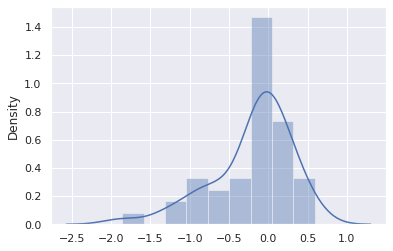

In [78]:
sns.distplot(y_pred-Y_n_test)

In [79]:
df_1 = pd.DataFrame(grid.cv_results_).set_index('rank_test_score').sort_index()
df_1.shape

(144, 16)

In [82]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_n_test)
print(mean_absolute_error(Y_n_test, y_pred))

0.3655760630747781


#Soluzione Finale

In [ ]:
# importo il csv

with open("/content/drive/MyDrive/Minicontest2/Test.xlsx", 'rb') as fp:
    df_test = pd.read_excel(fp)

df_test

In [25]:
df_test=df_test.drop(columns=["O/C oil"], axis=1)           

In [ ]:
df1 = df_test[df_test.isna().any(axis=1)]

df1

In [27]:
categorical_cols=df_test.columns[df_test.dtypes==object].tolist()
categorical_cols

['Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1']

In [28]:
df_test["Material_1_cat"]=df_test["Material_1"].astype('category').cat.codes
df_test["Type_1_cat"]=df_test["Type_1"].astype('category').cat.codes
df_test["Pretreatment_1_cat"]=df_test["Pretreatment_1"].astype('category').cat.codes
df_test["Particle Size, mm_1_cat"]=df_test["Particle Size, mm_1"].astype('category').cat.codes

In [29]:
df_test=df_test.drop(columns=['Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1'])

In [30]:
for column in df_test.columns[:-5]:
  
  df_test[column]=df_test[column].fillna(mediane[column])

df_test=df_test.fillna(-1)


#Decision Tree

In [31]:
#Dataset train
X=df.drop(columns=["O/C oil", 'Material_1', 'Type_1', 'Pretreatment_1', 'Particle Size, mm_1'])
Y=df["O/C oil"]

In [32]:
for column in X.columns[3:-1]:
  
  X[column]=X[column].fillna(mediane[column])

X=X.fillna(-1)


In [33]:
#Scale the data (Feature Scaling Z Score) z = (x - u) / s
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(df_test)

In [34]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor 
dtr_model = DecisionTreeRegressor(max_depth=8, random_state=42)
dtr_model.fit(X, Y)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [35]:
# test the output by changing values, like 3750
y_pred = dtr_model.predict(X_test)
  
# print the predicted price
print("Predicted O/C oil:")
print(y_pred) 

Predicted O/C oil:
[0.72516599 1.31644918 0.46138152 0.30721455 0.30721455 0.08388422
 0.30521715 1.31644918 0.72516599 0.87619435 0.30721455 0.8811328
 0.30721455 0.41343153 1.31644918 0.64851941 1.87914057 0.48761921
 0.30721455 2.21745756 0.04772499 0.30721455 0.72516599 0.30721455
 0.61300544 0.30721455 0.30721455 0.08388422 0.33117859 0.8811328
 0.30721455 0.48761921 0.30721455 0.30721455 0.78059528 0.30721455
 0.91022965 0.94505771 0.04772499 0.30721455 0.66997027 0.30721455
 0.30721455 0.64851941 0.48761921 1.31644918 0.8811328  1.31644918
 1.87914057 0.24139839 0.46069182 0.30721455 0.22393193 1.42204301
 0.08388422 0.30721455 0.64851941 1.31644918 0.30721455 0.66997027
 0.30721455 0.8926584  0.30721455 1.20179916 0.30721455 0.78059528
 0.30721455 0.30721455 0.282882   0.30721455 0.78059528 0.64851941
 2.21745756 0.30721455 0.8926584  0.66997027 0.8811328  2.21745756
 0.46669502 0.30721455 0.72516599 0.64851941 0.78059528 0.46138152
 0.30721455 0.30721455 0.06042876 0.30721455 

#Output file

In [36]:
id_list=[]

for i in range(1,91):
  id_list.append(i)

id=np.array(id_list)  #id

id

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90])

In [37]:
colonna_1=pd.DataFrame(id, columns=['ID'])

colonna_1

,ID
0,1
1,2
2,3
3,4
4,5
...,...
85,86
86,87
87,88
88,89


In [38]:
colonna_2=pd.DataFrame(y_pred, columns=["O/C oil"])

colonna_2


,O/C oil
0,0.725166
1,1.316449
2,0.461382
3,0.307215
4,0.307215
...,...
85,0.307215
86,0.060429
87,0.307215
88,0.769579


In [39]:
# concatenating along columns
horizontal_concat = pd.concat([colonna_1, colonna_2], axis=1)

In [40]:
horizontal_concat

,ID,O/C oil
0,1,0.725166
1,2,1.316449
2,3,0.461382
3,4,0.307215
4,5,0.307215
...,...,...
85,86,0.307215
86,87,0.060429
87,88,0.307215
88,89,0.769579


In [41]:
horizontal_concat.to_csv('Risultato_DT_8.csv', index = False)